<a href="https://colab.research.google.com/github/juanmed/dw_a/blob/main/package_detection_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!pip install -U --pre tensorflow=="2.2.0"
!pip install wget
!pip install gdown
!pip install zipfile36

  Using cached https://files.pythonhosted.org/packages/4c/1a/0d79814736cfecc825ab8094b39648cc9c46af7af1bae839928acb73b4dd/tensorflow-2.2.0-cp37-cp37m-manylinux2010_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/1d/74/0a6fcb206dcc72a6da9a62dd81784bfdbff5fedb099982861dc2219014fb/tensorboard-2.2.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a4/f5/926ae53d6a226ec0fda5208e0e581cffed895ccc89e36ba76a8e60895b78/tensorflow_estimator-2.2.0-py2.py3-none-any.whl
ERROR: tf-models-official 2.4.0 has requirement tensorflow>=2.4.0, but you'll have tensorflow 2.2.0 which is incompatible.
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.

In [2]:
import os
import pathlib

# Clone the tensorflow models repository if it doesn't already exist
if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 2449, done.
remote: Counting objects: 100% (2449/2449), done.
remote: Compressing objects: 100% (2042/2042), done.
remote: Total 2449 (delta 593), reused 1347 (delta 380), pack-reused 0
Receiving objects: 100% (2449/2449), 30.84 MiB | 38.24 MiB/s, done.
Resolving deltas: 100% (593/593), done.


In [ ]:
# Install the Object Detection API
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

In [4]:
!pip install zipfile36
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9681 sha256=0b675ce7e6e912f6d29e8559246c813aa95b945311a2d9f9ec6b108701de1d40
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [5]:
import pathlib as pl

images_path = "./images"
model_path = "./model"

if not os.path.exists(images_path):
  pl.Path(images_path).mkdir(parents=True, exist_ok=True)
if not os.path.exists(model_path):
  pl.Path(model_path).mkdir(parents=True, exist_ok=True)

In [6]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf

tf.get_logger().setLevel('ERROR')           # Suppress TensorFlow logging (2)

# Enable GPU dynamic memory allocation
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

def download_images():
    base_url = 'https://raw.githubusercontent.com/juanmed/dw_a/main/dll_package_recognition/'
    filenames = ['pkrecog_002_0005.jpg', 'pkrecog_003_0011.jpg', 'pkrecog_004_0010.jpg', 'pkrecog_006_0002.jpg', 'pkrecog_006_0009.jpg', 'pkrecog_006_0019.jpg']
    image_paths = []
    for filename in filenames:
        image_path = tf.keras.utils.get_file(fname=filename,
                                            origin=base_url + filename,
                                            untar=False)
        image_path = pathlib.Path(image_path)
        image_paths.append(str(image_path))
    return image_paths

IMAGE_PATHS = download_images()


499712/496738 [==============================] - 0s 0us/step


In [7]:
import shutil
for img in IMAGE_PATHS:
  shutil.move(img, "./images/" + img.split("/")[-1])

IMAGE_PATHS = os.listdir("./images")
IMAGE_PATHS = ["./images/" + f for f in IMAGE_PATHS ]

In [8]:
IMAGE_PATHS

['./images/pkrecog_003_0011.jpg',
 './images/pkrecog_004_0010.jpg',
 './images/pkrecog_002_0005.jpg',
 './images/pkrecog_006_0002.jpg',
 './images/pkrecog_006_0009.jpg',
 './images/pkrecog_006_0019.jpg']

In [9]:
# Download and extract model
import gdown
#https://drive.google.com/file/d/1r3dpmqPX-Vm3bCkhoAqPOKp6574_RU9p/view?usp=sharing"
url = 'https://drive.google.com/uc?id=1r3dpmqPX-Vm3bCkhoAqPOKp6574_RU9p'
output = 'ssd_540x640_batch8.zip'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1r3dpmqPX-Vm3bCkhoAqPOKp6574_RU9p
To: /content/ssd_540x640_batch8.zip
237MB [00:05, 39.9MB/s]


'ssd_540x640_batch8.zip'

In [10]:
import sys
if sys.version_info >= (3, 6):
    import zipfile
else:
    import zipfile36 as zipfile
# Create a ZipFile Object and load sample.zip in it
with zipfile.ZipFile(output, 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall(model_path)

In [11]:
import wget
labelmap_url = "https://raw.githubusercontent.com/juanmed/dw_a/main/dll_package_recognition/label_map.pbtxt"
labelmap_file = wget.download(labelmap_url)

In [ ]:
# Install COCO evaluation tools
%%bash 
git clone https://github.com/cocodataset/cocoapi.git
cd cocoapi/PythonAPI
make
cp -r pycocotools ../../models/research/

In [13]:
import time
import tensorflow as tf 
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = model_path + "/my_model" + "/saved_model"

print('Loading model...', end='')
start_time = time.time()

# Load saved model and build the detection function
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

Loading model...Done! Took 12.03857946395874 seconds


In [14]:
category_index = label_map_util.create_category_index_from_labelmap(labelmap_file,
                                                                    use_display_name=True)

Running inference for ./images/pkrecog_003_0011.jpg... Done
Running inference for ./images/pkrecog_004_0010.jpg... Done
Running inference for ./images/pkrecog_002_0005.jpg... Done
Running inference for ./images/pkrecog_006_0002.jpg... Done
Running inference for ./images/pkrecog_006_0009.jpg... Done
Running inference for ./images/pkrecog_006_0019.jpg... Done


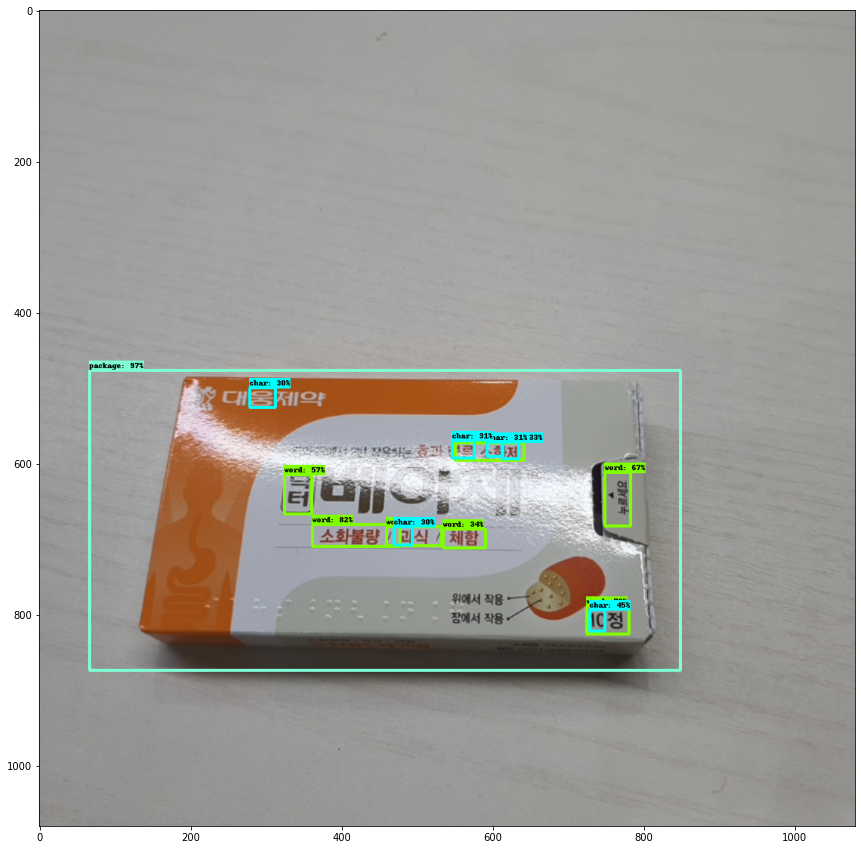

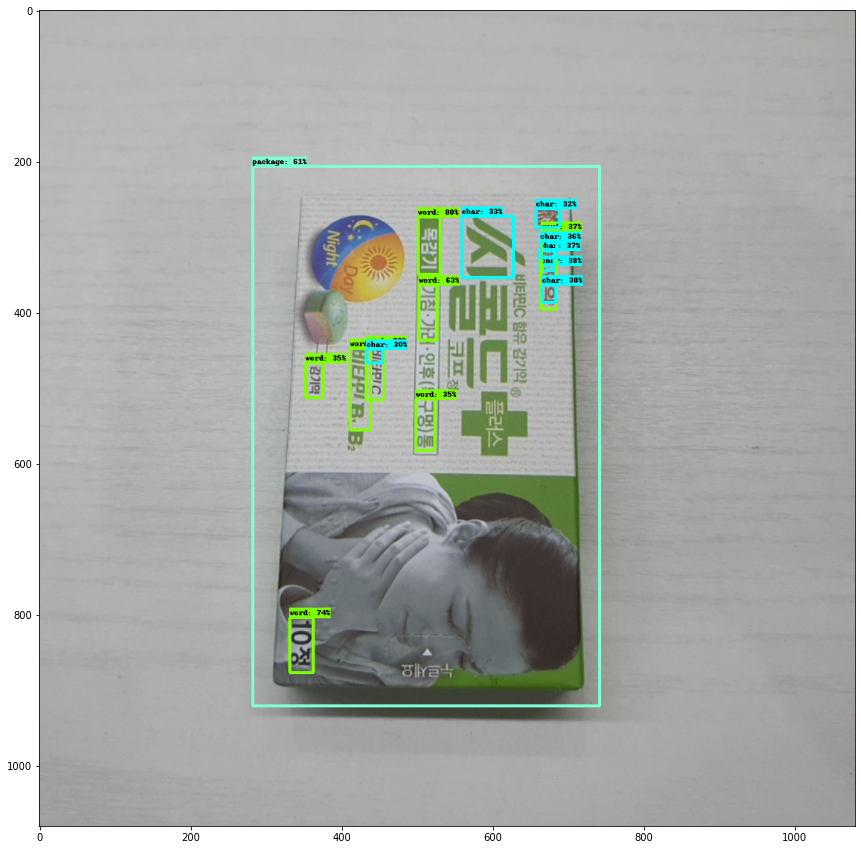

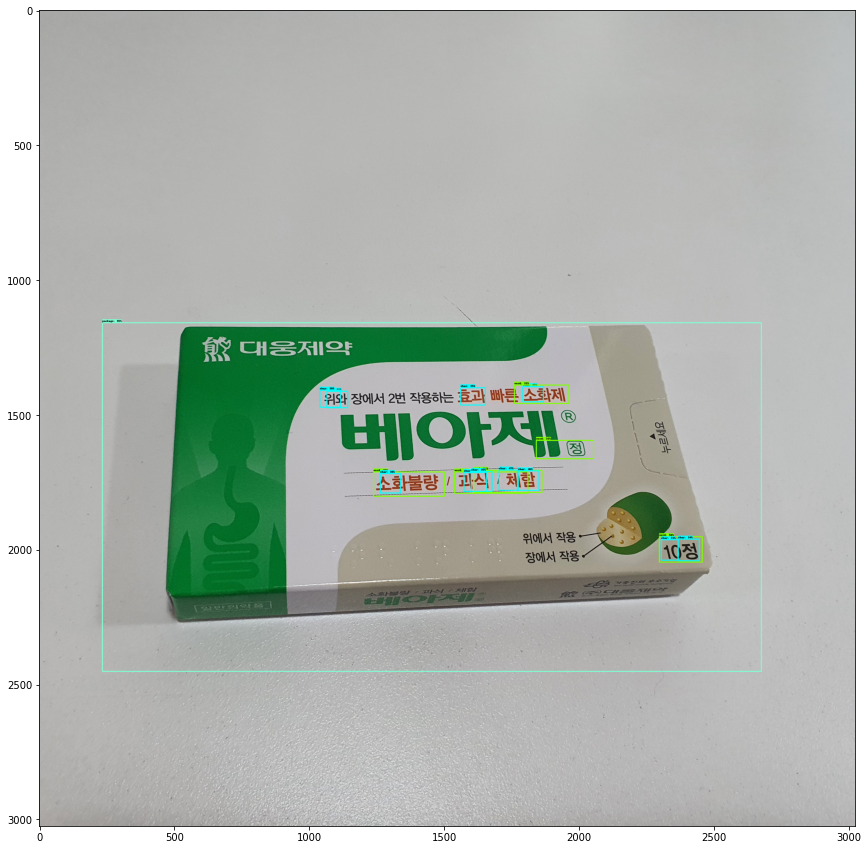

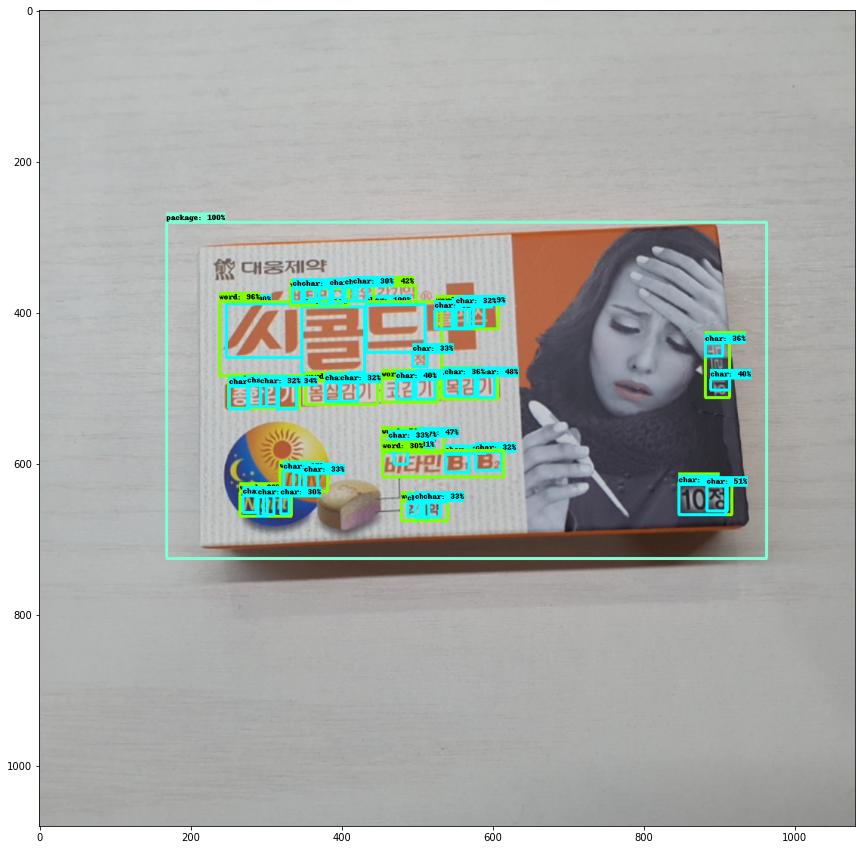

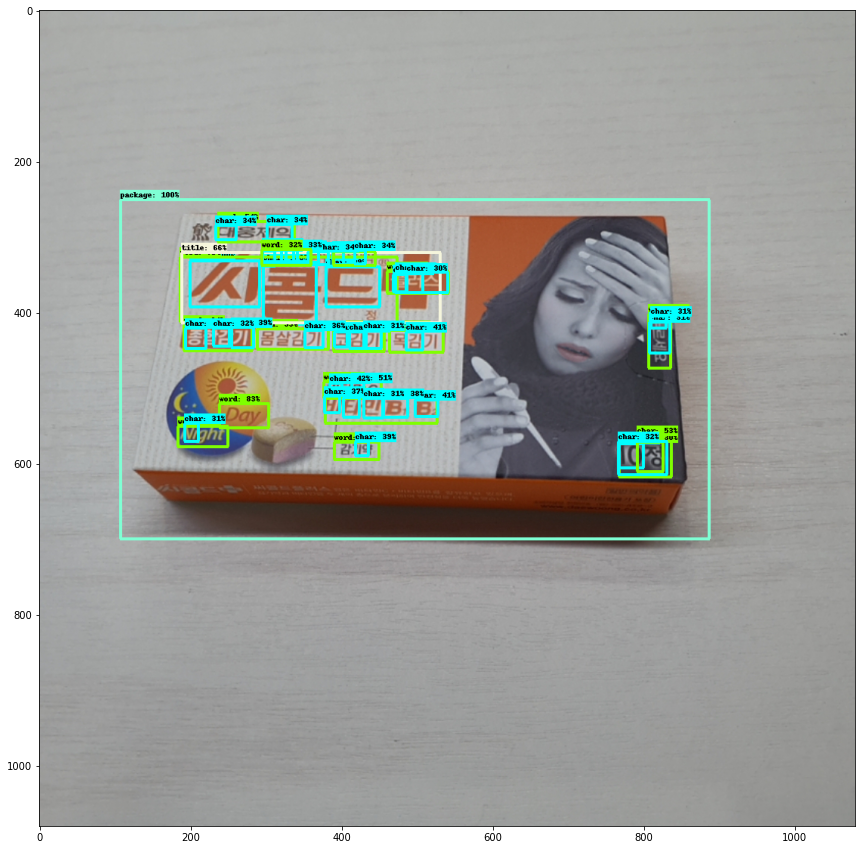

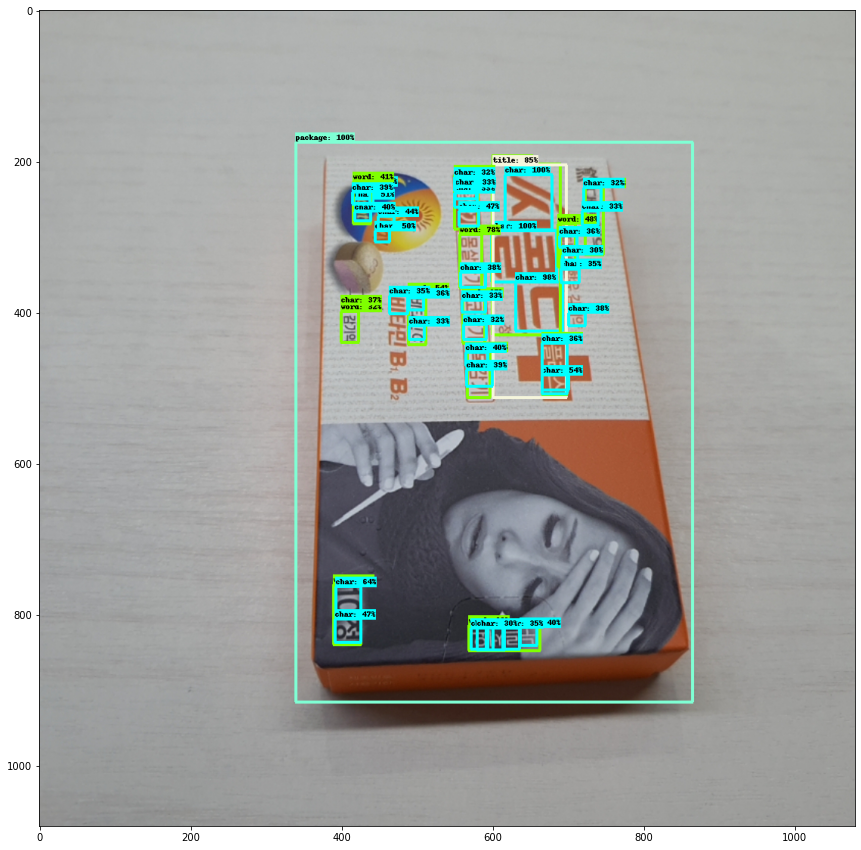

In [18]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings
%matplotlib inline

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
      path: the file path to the image

    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))


for image_path in IMAGE_PATHS:

    print('Running inference for {}... '.format(image_path), end='')

    image_np = load_image_into_numpy_array(image_path)

    # Things to try:
    # Flip horizontally
    # image_np = np.fliplr(image_np).copy()

    # Convert image to grayscale
    # image_np = np.tile(
    #     np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor = tf.convert_to_tensor(image_np)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis, ...]

    # input_tensor = np.expand_dims(image_np, 0)
    detections = detect_fn(input_tensor)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                   for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=200,
          min_score_thresh=.3,
          agnostic_mode=False)

    plt.figure(figsize=(15,15))
    plt.imshow(image_np_with_detections)
    print('Done')
plt.show()

# sphinx_gallery_thumbnail_number = 2

In [20]:
# Evaluate model
import pathlib as pl

training_path = "./workspace/training_demo"
annotations_path = "./annotations"

if not os.path.exists(training_path+"/images/train"):
  pl.Path(training_path+"/images/train").mkdir(parents=True, exist_ok=True)
if not os.path.exists(training_path+"/test"):
  pl.Path(training_path+"/images/test").mkdir(parents=True, exist_ok=True)
if not os.path.exists(annotations_path):
  pl.Path(annotations_path).mkdir(parents=True, exist_ok=True)

In [22]:
import wget
dataset_partition_url = "https://raw.githubusercontent.com/juanmed/dw_a/main/dll_package_recognition/dataset_partition.py"
dataset_partition_file = wget.download(dataset_partition_url)

In [23]:
# get images
#images_url = "https://drive.google.com/file/d/1aXYKA0_-flbqhUfzU8Z7uoB33hvVn-DJ/view?usp=sharing"
import gdown
import shutil
url = 'https://drive.google.com/uc?id=1aXYKA0_-flbqhUfzU8Z7uoB33hvVn-DJ'
output = 'image_pack.zip'
gdown.download(url, output, quiet=False)
shutil.move(output, training_path+"/images/"+output)

Downloading...
From: https://drive.google.com/uc?id=1aXYKA0_-flbqhUfzU8Z7uoB33hvVn-DJ
To: /content/image_pack.zip
19.6MB [00:00, 123MB/s] 


'./workspace/training_demo/images/image_pack.zip'

In [24]:
import sys
if sys.version_info >= (3, 6):
    import zipfile
else:
    import zipfile36 as zipfile
# Create a ZipFile Object and load sample.zip in it
with zipfile.ZipFile(training_path+"/images/"+output, 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall(training_path+"/images/")

In [25]:
# Partition the dataset
%%bash
python dataset_partition.py -x -i "./workspace/training_demo/images/pkrecog_006" -o "./workspace/training_demo/images/" -r 0.9

In [26]:
gen_tf_url = "https://raw.githubusercontent.com/juanmed/dw_a/main/dll_package_recognition/generate_tfrecord.py"
wget.download(gen_tf_url)
anno_path = "./workspace/training_demo/annotations"
if not os.path.exists(anno_path):
  pl.Path(anno_path).mkdir(parents=True, exist_ok=True)

shutil.move(labelmap_file, anno_path+"/"+labelmap_file)


'./workspace/training_demo/annotations/label_map.pbtxt'

In [27]:
# Generate .record files
%%bash
python generate_tfrecord.py -x ./workspace/training_demo/images/train -l ./workspace/training_demo/annotations/label_map.pbtxt -o ./workspace/training_demo/annotations/train.record
python generate_tfrecord.py -x ./workspace/training_demo/images/test -l ./workspace/training_demo/annotations/label_map.pbtxt -o ./workspace/training_demo/annotations/test.record

Successfully created the TFRecord file: ./workspace/training_demo/annotations/train.record
Successfully created the TFRecord file: ./workspace/training_demo/annotations/test.record


In [29]:
net_name = "ssd_resnet50_v1_fpn_640x640_coco17_tpu-8"
config_url = "https://raw.githubusercontent.com/juanmed/dw_a/main/dll_package_recognition/{}.config".format(net_name)
config_file = wget.download(config_url)

shutil.move(config_file, model_path + "/" + config_file)
shutil.copy("./models/research/object_detection/model_main_tf2.py","./workspace/training_demo/model_main_tf2.py")

'./workspace/training_demo/model_main_tf2.py'

In [31]:
# Start evaluation
%%bash
cd workspace/training_demo/
python model_main_tf2.py --alsologtostderr --model_dir=models/my_model --pipeline_config_path=model/my_model/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.config --checkpoint_dir=model/my_model

/usr/local/lib/python3.7/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:67: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.3.0 and strictly below 2.5.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.2.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  UserWarning,
Traceback (most recent call last):
  File "model_main_tf2.py", line 32, in <module>
    from object_detection import model_lib_v2
  File "/usr/local/lib/python3.7/dist-packages/object_detection/model_lib_v2.py", line 31, in <module>
    from object_detection import model_lib
  File "